In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
city_data = pd.read_csv('raw_data/city_data.csv')
city_data.head(10)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [4]:
ride_data = pd.read_csv('raw_data/ride_data.csv')
ride_data.head(10)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082
8,Travisville,2016-01-15 17:32:02,27.39,850152768361
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524


In [5]:
# Check for data integrity in city_data
city_data.count()

city            126
driver_count    126
type            126
dtype: int64

In [6]:
# Check for data integrity in ride_data
ride_data.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [7]:
# Extract columns labeled "city" and "fare" from ride_data
ride_fare_data = ride_data[['city', 'fare']]
ride_fare_data.head()

,city,fare
0,Sarabury,38.35
1,South Roy,17.49
2,Wiseborough,44.18
3,Spencertown,6.87
4,Nguyenbury,6.28


In [8]:
#Average ride fare (per city)
group_city_ride_fare = ride_fare_data.groupby(['city'])
group_city_ride_fare.mean().head()

,fare
city,
Alvarezhaven,23.928710
Alyssaberg,20.609615
Anitamouth,37.315556
Antoniomouth,23.625000
Aprilchester,21.981579


In [9]:
merge_data = pd.merge(city_data, ride_data, on="city")
merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [10]:
# Extract columns labeled "city", "driver_count" and "type" from merged tables.
merge_ride_data = merge_data[['city', 'driver_count', 'type', 'date']]
group_merge_ride = merge_ride_data.groupby(['city'])
group_merge_driver_count_df = pd.DataFrame(group_merge_ride['driver_count'].count())
group_merge_driver_count_df.head()

,driver_count
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [11]:
group_merge_ride_count_df = pd.DataFrame(group_merge_ride['date'].count())
group_merge_ride_count_df.head()

,date
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [12]:
bubbletype = group_merge_ride['type']
bubbletype.head()

0       Urban
1       Urban
2       Urban
3       Urban
4       Urban
28      Urban
29      Urban
30      Urban
31      Urban
32      Urban
54      Urban
55      Urban
56      Urban
57      Urban
58      Urban
76      Urban
77      Urban
78      Urban
79      Urban
80      Urban
105     Urban
106     Urban
107     Urban
108     Urban
109     Urban
128     Urban
129     Urban
130     Urban
131     Urban
132     Urban
        ...  
2355    Rural
2356    Rural
2357    Rural
2358    Rural
2359    Rural
2360    Rural
2366    Rural
2367    Rural
2368    Rural
2369    Rural
2370    Rural
2376    Rural
2377    Rural
2378    Rural
2379    Rural
2380    Rural
2387    Rural
2388    Rural
2389    Rural
2390    Rural
2391    Rural
2396    Rural
2397    Rural
2398    Rural
2399    Rural
2400    Rural
2401    Rural
2402    Rural
2403    Rural
2404    Rural
Name: type, Length: 618, dtype: object

In [13]:
# The maximum x and y value for our chart

x_limit = int(group_merge_ride_count_df.max())
y_limit = int(group_city_ride_fare.mean().max())

print(x_limit, y_limit)

64 49


In [14]:
x_axis = group_merge_ride_count_df.values
y_axis = group_city_ride_fare.mean().values

#driver count per city 
dcount = 5 * group_merge_driver_count_df.values

plt.title("Pyber Ride Sharing Data(2016)")

plt.xlabel("Total Number of Rides (per City)") 
plt.ylabel("Average Fares($)")

#use_colors = {"Urban": "red", "Suburban": "coral", "Rural": "green"}

plt.xlim(0, int(x_limit+5)) 
plt.ylim(0, int(y_limit+5))

plt.grid(True)

plt.scatter(x_axis, y_axis, marker="o", facecolors= 'red', edgecolors="black", s=dcount, alpha=0.75)

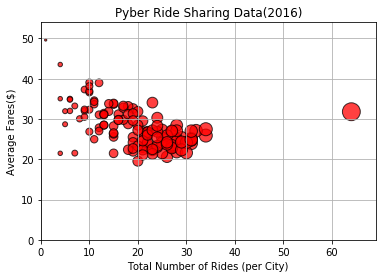

In [15]:
plt.show()

In [16]:
drivers_by_ctype = merge_data.groupby('type')
new_df = drivers_by_ctype.count()
new_df

,city,driver_count,date,fare,ride_id
type,,,,,
Rural,125,125,125,125,125
Suburban,657,657,657,657,657
Urban,1625,1625,1625,1625,1625


In [32]:
new_df_fare = drivers_by_ctype.sum()
fare_by_type = new_df_fare.reset_index()
fare_by_type.head()

,type,driver_count,fare,ride_id
0,Rural,727,4255.09,658729360193746
1,Suburban,9730,20335.69,3139583688401015
2,Urban,64501,40078.34,7890194186030600


In [17]:
new_driver_df = drivers_by_ctype.count().reset_index()
new_driver_df

,type,city,driver_count,date,fare,ride_id
0,Rural,125,125,125,125,125
1,Suburban,657,657,657,657,657
2,Urban,1625,1625,1625,1625,1625


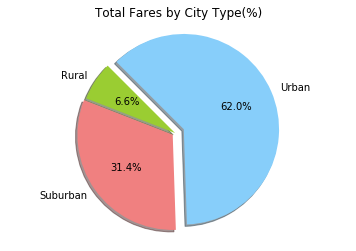

In [34]:
plt.title("Total Fares by City Type(%)")

city_types = fare_by_type['type']
fares = fare_by_type['fare']
colors = ["yellowgreen", "lightcoral", "lightskyblue"]
explode = (0, 0.03, 0.1)
plt.pie(fares, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.show()


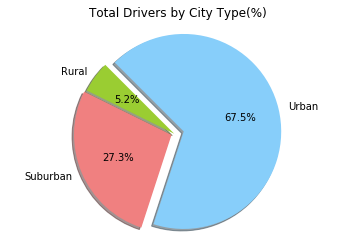

In [18]:
plt.title("Total Drivers by City Type(%)")

city_types = new_driver_df['type']
drivers = new_driver_df['driver_count']
colors = ["yellowgreen", "lightcoral", "lightskyblue"]
explode = (0, 0.03, 0.1)
plt.pie(drivers, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.show()


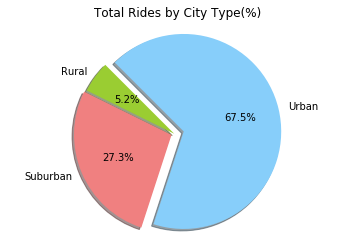

In [19]:
plt.title("Total Rides by City Type(%)")

city_types = new_driver_df['type']
rides = new_driver_df['ride_id']
colors = ["yellowgreen", "lightcoral", "lightskyblue"]
explode = (0, 0.03, 0.1)
plt.pie(rides, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.show()

In [ ]:
# Observable Trend:
# 1.There is a major cluster of points in the bubble chart (scatter plot) at the eenter showing that majority of rides
#cost about $20-$30 and there are 20-30 rides per city.
#2.The demand in Rural areas and the revenue generated from rural areas is very marginal.
#3.Very rarely the average fare is above $50. Even $40 fare is quite rare.
#4.There is a direct correlation between number of drivers and number of rides
#5.Pyber needs to expand its scope in urban areas by hiring more drivers in those regions.